# Initial exploration of the ACN-Data API

Uses the HTTP API of the [ACN-Data](https://ev.caltech.edu/dataset) to download the data and inspect it.

Note, this requires an API Token for the ACN-Data API to be set as the `ACN_DATA_API_TOKEN` environment variable, or provided as a parameter if using [papermill](https://papermill.readthedocs.io/en/latest/index.html) to run the notebook.

In [65]:
import datetime
import os
import pandas as pd
import pprint
import seaborn as sns

from acnportal.acndata import DataClient

In [2]:
ACN_DATA_API_URL = 'https://ev.caltech.edu/api/v1/'
ACN_DATA_API_TOKEN = os.getenv('ACN_DATA_API_TOKEN')
START_TIME = '2019-05-01T00:00:00+00:00'  # ISO Format
END_TIME = '2019-05-02T00:00:00+00:00'    # ISO Format

In [18]:
client = DataClient(ACN_DATA_API_TOKEN, ACN_DATA_API_URL)

res = client.get_sessions_by_time(
    'caltech',
    start=datetime.datetime.fromisoformat(START_TIME),
    end=datetime.datetime.fromisoformat(END_TIME),
)

data = list(res)

print(f"{len(data)} rows collected")

44 rows collected


In [19]:
pprint.pprint(data[0])

{'_id': '5cde00a7f9af8b123b067201',
 'clusterID': '0039',
 'connectionTime': datetime.datetime(2019, 4, 30, 18, 18, 34, tzinfo=<DstTzInfo 'America/Los_Angeles' PDT-1 day, 17:00:00 DST>),
 'disconnectTime': datetime.datetime(2019, 4, 30, 19, 45, 36, tzinfo=<DstTzInfo 'America/Los_Angeles' PDT-1 day, 17:00:00 DST>),
 'doneChargingTime': datetime.datetime(2019, 4, 30, 19, 45, 31, tzinfo=<DstTzInfo 'America/Los_Angeles' PDT-1 day, 17:00:00 DST>),
 'kWhDelivered': 4.804,
 'sessionID': '2_39_138_29_2019-05-01 01:18:34.430773',
 'siteID': '0002',
 'spaceID': 'CA-304',
 'stationID': '2-39-138-29',
 'timezone': 'America/Los_Angeles',
 'userID': '000001164',
 'userInputs': [{'WhPerMile': 525,
                 'kWhRequested': 10.5,
                 'milesRequested': 20,
                 'minutesAvailable': 236,
                 'modifiedAt': 'Wed, 01 May 2019 01:19:53 GMT',
                 'paymentRequired': True,
                 'requestedDeparture': 'Wed, 01 May 2019 05:14:34 GMT',
          

In [69]:
df = pd.DataFrame(data)

# naive unpacking of 'userInputs' list
for k in data[0]['userInputs'][0]:
    df[k] = [v[0].get(k) if v else None for v in df.userInputs.values.tolist()]
df.head()

,_id,userInputs,userID,sessionID,stationID,spaceID,siteID,clusterID,connectionTime,disconnectTime,kWhDelivered,doneChargingTime,timezone,milesRequested,WhPerMile,minutesAvailable,modifiedAt,paymentRequired,requestedDeparture,kWhRequested
0,5cde00a7f9af8b123b067201,"[{'userID': 1164, 'milesRequested': 20, 'WhPer...",1164.0,2_39_138_29_2019-05-01 01:18:34.430773,2-39-138-29,CA-304,0002,0039,2019-04-30 18:18:34-07:00,2019-04-30 19:45:36-07:00,4.804,2019-04-30 19:45:31-07:00,America/Los_Angeles,20.0,525.0,236.0,"Wed, 01 May 2019 01:19:53 GMT",True,"Wed, 01 May 2019 05:14:34 GMT",10.50
1,5cde00a7f9af8b123b067202,"[{'userID': 1509, 'milesRequested': 30, 'WhPer...",1509.0,2_39_127_19_2019-05-01 01:19:02.861477,2-39-127-19,CA-309,0002,0039,2019-04-30 18:19:03-07:00,2019-04-30 19:41:29-07:00,5.800,2019-04-30 19:18:44-07:00,America/Los_Angeles,30.0,400.0,73.0,"Wed, 01 May 2019 01:19:54 GMT",True,"Wed, 01 May 2019 02:32:03 GMT",12.00
2,5cde00a7f9af8b123b067203,"[{'userID': 2192, 'milesRequested': 20, 'WhPer...",2192.0,2_39_129_17_2019-05-01 01:35:21.105598,2-39-129-17,CA-307,0002,0039,2019-04-30 18:35:21-07:00,2019-04-30 19:43:40-07:00,7.725,2019-04-30 19:43:35-07:00,America/Los_Angeles,20.0,600.0,59.0,"Wed, 01 May 2019 01:36:21 GMT",True,"Wed, 01 May 2019 02:34:21 GMT",12.00
3,5cde00a7f9af8b123b067204,"[{'userID': 1826, 'milesRequested': 80, 'WhPer...",1826.0,2_39_139_28_2019-05-01 01:40:46.205473,2-39-139-28,CA-303,0002,0039,2019-04-30 18:40:56-07:00,2019-05-01 16:22:48-07:00,7.123,2019-04-30 19:52:43-07:00,America/Los_Angeles,80.0,400.0,720.0,"Wed, 01 May 2019 01:40:55 GMT",True,"Wed, 01 May 2019 13:40:56 GMT",32.00
4,5cde00a7f9af8b123b067205,"[{'userID': 1099, 'milesRequested': 80, 'WhPer...",1099.0,2_39_127_19_2019-05-01 03:27:30.968615,2-39-127-19,CA-309,0002,0039,2019-04-30 20:27:31-07:00,2019-04-30 22:39:48-07:00,13.504,2019-04-30 22:39:39-07:00,America/Los_Angeles,80.0,438.0,111.0,"Wed, 01 May 2019 03:29:00 GMT",True,"Wed, 01 May 2019 05:18:31 GMT",35.04


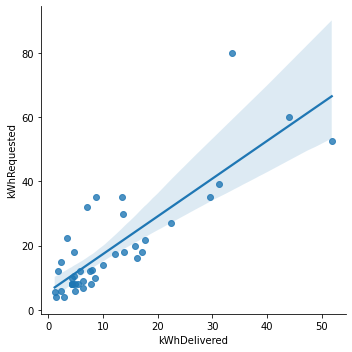

In [82]:
ax = sns.lmplot(data = df, x = 'kWhDelivered', y = 'kWhRequested')